# Lesson 1 - Introduction to Numpy and Pandas

## Working with Files

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET

%matplotlib inline

## CSV

In [2]:
df = pd.read_csv('purchases.csv')

In [3]:
print(df)

  Unnamed: 0 country  ad_views  items_purchased
0     George      US        16                2
1       John     CAN        42                1
2     Thomas     CAN        32                0
3      James      US        13                8
4     Andrew     CAN        63                0
5     Martin      US        19                5
6    William      US        65                7
7    Zachary      US        23                3
8    Millard     CAN        16                0
9   Franklin      US        77                5


In [4]:
df.to_csv('my_data.csv')

## JSON

In [5]:
df2 = pd.read_json('purchases.json')

In [6]:
print(df2)

  Unnamed: 0 country  ad_views  items_purchased
0     George      US        16                2
1       John     CAN        42                1
2     Thomas     CAN        32                0
3      James      US        13                8
4     Andrew     CAN        63                0
5     Martin      US        19                5
6    William      US        65                7
7    Zachary      US        23                3
8    Millard     CAN        16                0
9   Franklin      US        77                5


In [7]:
df2.to_json('my_data.json')

In [8]:
serialized_purchases = df2.to_json()

In [9]:
serialized_purchases

'{"Unnamed: 0":{"0":"George","1":"John","2":"Thomas","3":"James","4":"Andrew","5":"Martin","6":"William","7":"Zachary","8":"Millard","9":"Franklin"},"country":{"0":"US","1":"CAN","2":"CAN","3":"US","4":"CAN","5":"US","6":"US","7":"US","8":"CAN","9":"US"},"ad_views":{"0":16,"1":42,"2":32,"3":13,"4":63,"5":19,"6":65,"7":23,"8":16,"9":77},"items_purchased":{"0":2,"1":1,"2":0,"3":8,"4":0,"5":5,"6":7,"7":3,"8":0,"9":5}}'

## XML

In [10]:
tree = ET.parse('purchases.xml')

In [11]:
root = tree.getroot()

In [12]:
def xml_to_list(root):
    result = []
    for row in root:
        row_list = []
        for column in row:
            row_list.append(column.text)
        result.append(row_list)
    return result

In [13]:
df3 = pd.DataFrame(xml_to_list(root))

In [14]:
print(df3)

          0    1   2  3
0    George   US  16  2
1      John  CAN  42  1
2    Thomas  CAN  32  0
3     James   US  13  8
4    Andrew  CAN  63  0
5    Martin   US  19  5
6   William   US  65  7
7   Zachary   US  23  3
8   Millard  CAN  16  0
9  Franklin   US  77  5


## Python open()

In [15]:
with open('poem.txt') as poem_file:
    text = poem_file.readlines()
    print("This file is {} lines long...\n".format(len(text)))
    for line in text:
        print(line.strip())

This file is 19 lines long...

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [16]:
with open('purchases.csv') as purchases_file:
    reader = csv.reader(purchases_file)
    for row in reader:
        print(', '.join(row))

, country, ad_views, items_purchased
George, US, 16, 2
John, CAN, 42, 1
Thomas, CAN, 32, 0
James, US, 13, 8
Andrew, CAN, 63, 0
Martin, US, 19, 5
William, US, 65, 7
Zachary, US, 23, 3
Millard, CAN, 16, 0
Franklin, US, 77, 5


# Lesson 2 - Data visualizations with matplotlib

## Basic Plot and Scatter

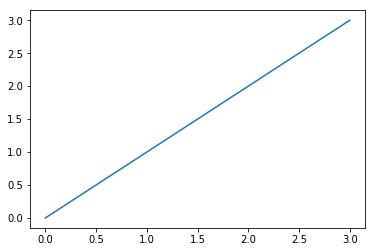

In [18]:
plt.plot([0, 1, 2, 3])
plt.show()

In [21]:
np.random.seed(1221)

df = pd.DataFrame()

df['rand'] = np.random.rand(100)
df['rand_sq'] = df['rand'] ** 2
df['rand_shift'] = df['rand'] + 2

df['counts_sq'] = df.index ** 2
df['counts_sqrt'] = np.sqrt(df.index)

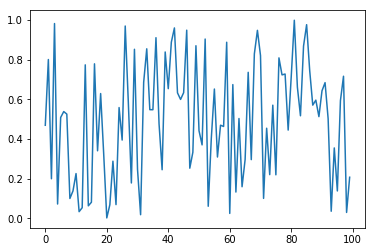

In [22]:
plt.plot(df['rand'])
plt.show()

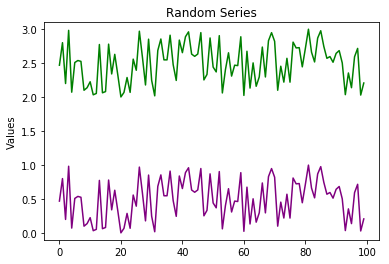

In [26]:
plt.plot(df['rand'], color='purple')
plt.plot(df['rand_shift'], color='green')
plt.ylim([-0.1, 3.1])
plt.ylabel('Values')
plt.title('Random Series')
plt.show()

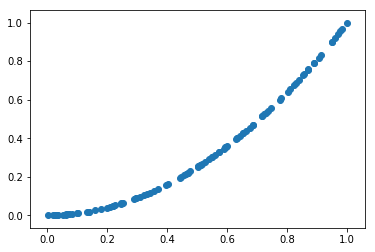

In [27]:
plt.scatter(x=df['rand'], y=df['rand_sq'])
plt.show()

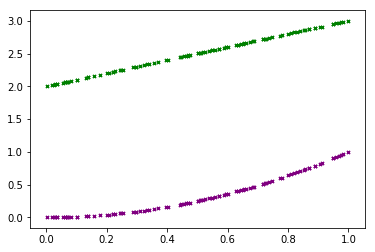

In [29]:
plt.scatter(
    x=df['rand'],
    y=df['rand_sq'],
    color='purple',
    marker='x',
    s=10
)

plt.scatter(
    x=df['rand'],
    y=df['rand_shift'],
    color='green',
    marker='x',
    s=10
)

plt.show()

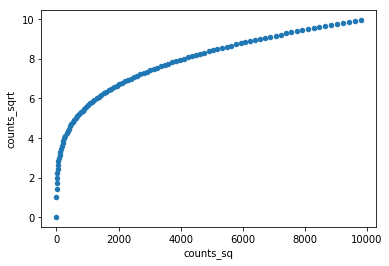

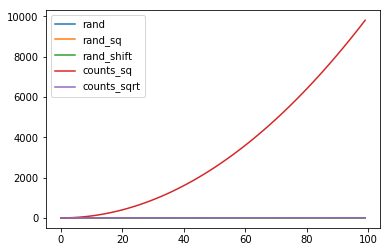

In [34]:
df.plot(kind='scatter', x='counts_sq', y='counts_sqrt')
df.plot(kind='line')
plt.show()

## Subplots

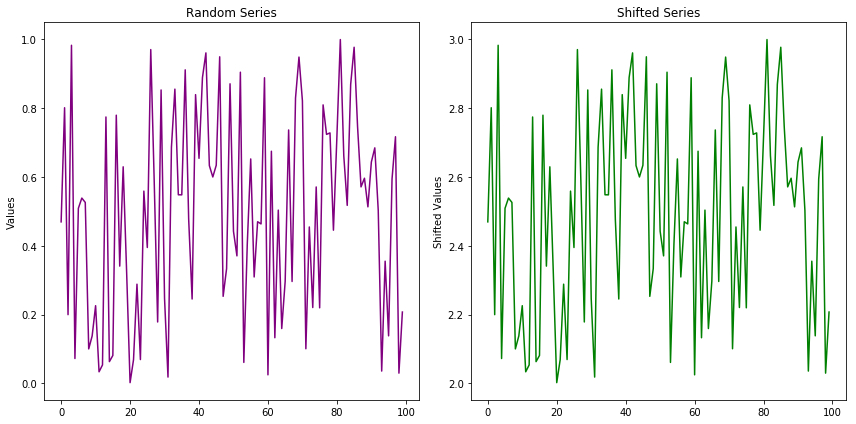

In [41]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(df['rand'], color='purple')
plt.ylabel('Values')
plt.title('Random Series')

plt.subplot(1, 2, 2)
plt.plot(df['rand_shift'], color='green')
plt.ylabel('Shifted Values')
plt.title('Shifted Series')

plt.tight_layout()
plt.show()

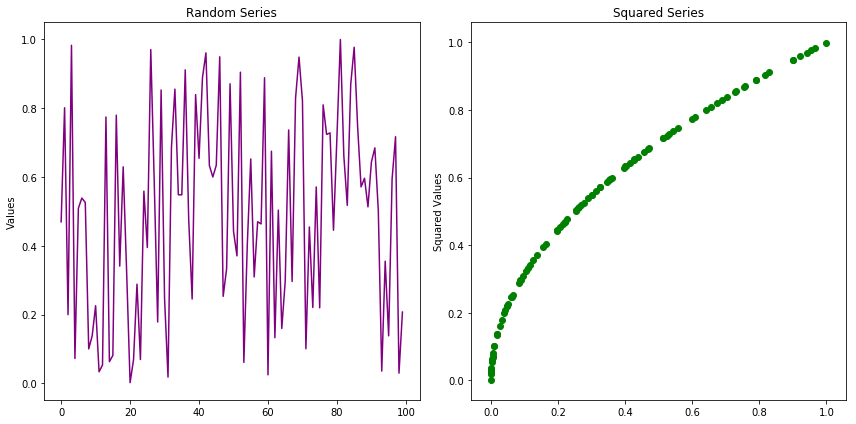

In [43]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(df['rand'], color='purple')
plt.ylabel('Values')
plt.title('Random Series')

plt.subplot(1, 2, 2)
plt.scatter(x = df['rand_sq'], y = df['rand'], color='green')
plt.ylabel('Squared Values')
plt.title('Squared Series')

plt.tight_layout()
plt.show()

## Statistical Plots

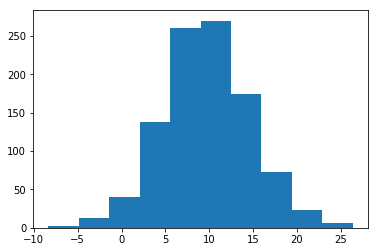

In [47]:
x = np.random.normal(10, 5, 1000)

plt.hist(x)
plt.show()

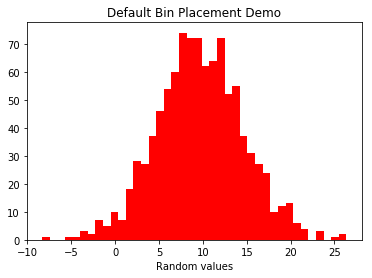

In [49]:
plt.hist(x, bins=40, color='red')
plt.title('Default Bin Placement Demo')
plt.xlabel('Random values')

plt.show()

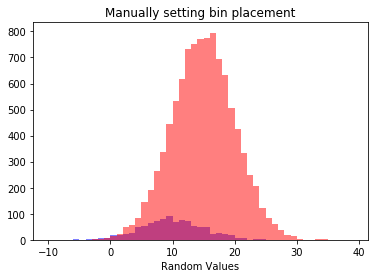

In [50]:
x = np.random.normal(10, 5, 1000)
y = np.random.normal(15, 5, 10000)

plt.hist(x, color='blue', bins=np.arange(-10, 40), alpha=0.5)
plt.hist(y, color='red', bins=np.arange(-10, 40), alpha=0.5)
plt.title('Manually setting bin placement')
plt.xlabel('Random Values')

plt.show()

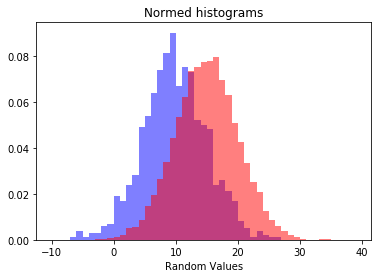

In [52]:
plt.hist(x, density=True, color='blue', bins=np.arange(-10, 40), alpha=.5) 
plt.hist(y, density=True, color='red', bins=np.arange(-10, 40), alpha=.5)
plt.title('Normed histograms')
plt.xlabel('Random Values')

plt.show()

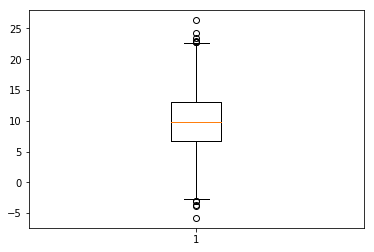

In [53]:
np.random.seed(111)

x = np.random.normal(10, 5, 1000)

plt.boxplot(x)
plt.show()

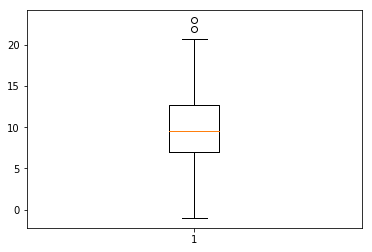

In [54]:
np.random.seed(111)

x = np.random.normal(10, 5, 100)

plt.boxplot(x)
plt.show()